In [4]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### GRADED 
Use global and groupby aggregates to answer the following questions

    - What is the average tip amount 
    - What is the average bill amount 
    - What is the average tip by gender 
    - What is the average tip on a sunday by gender 
    - Which party size gives the maximum tip as a percent of total bill amount 

In [5]:
print("1. What is the average tip amount")
tips['tip'].mean()

1. What is the average tip amount


2.9982786885245902

In [7]:
print("2. What is the average bill amount")
tips['total_bill'].mean()

2. What is the average bill amount


19.785942622950824

In [11]:
groupby_gender = tips['tip'].groupby(tips['sex']).mean()
listVal = list(groupby_gender)
print("Average tip for male is {} while femaile is {}".format(listVal[0], listVal[1]))

Average tip for male is 3.0896178343949052 while femaile is 2.833448275862069


In [14]:
tips_sunday = tips[tips['day'] == 'Sun']
sun_tip = tips_sunday['tip'].groupby([tips_sunday['day'], tips_sunday['sex']]).mean()
listVal = list(sun_tip)
print("The average tip on a sunday for male is {} and female is {}".format(listVal[0], listVal[1]))

The average tip on a sunday for male is 3.2203448275862083 and female is 3.3672222222222223


In [34]:
tips['tip_percent'] = (tips['tip']/tips['total_bill']) * 100
tip_percent_max = tips.groupby(['tip_percent']).max()
highest_value = tip_percent_max.iloc[-1:]
size = highest_value.iloc[0]['size']
print("The size of party that gives maximum tip as a percent of total bill amount is {}".format(int(size)));

The size of party that gives maximum tip as a percent of total bill amount is 2


### GRADED
    - Generate a scatter plot of tip amount (y-axis) and total_bill (x-axis)
    - Generate the plots using matplotlib, bokeh and seaborn


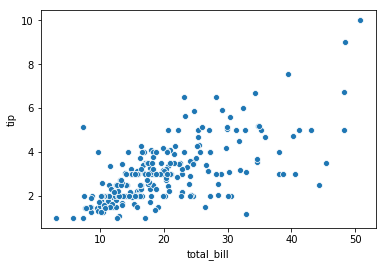

In [20]:
sns.scatterplot(total_bill,tip)

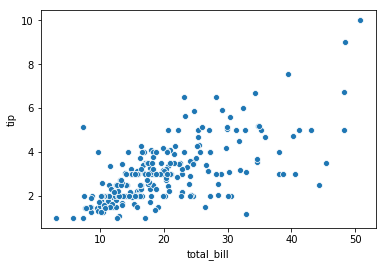

In [19]:
import seaborn as sns
sns.scatterplot(total_bill,tip)

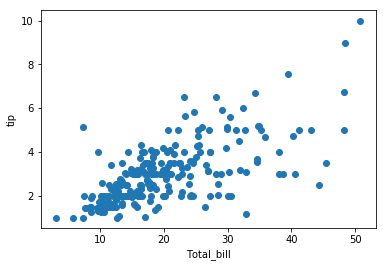

In [24]:
plt.xlabel('Total_bill')
plt.ylabel('tip')
plt.scatter(tips['total_bill'], tips['tip'])

In [26]:
from bokeh.plotting import figure
output_notebook()
x = tips['total_bill'] y= tips['tip'] 
p = figure(x_axis_label = 'total+bill', y_axis_label ='Tip')

show(p)

SyntaxError: invalid syntax (<ipython-input-26-3466a6ed3d2d>, line 3)

### GRADED
    - Generate a box plot that shows average bill amount by day of week
    - Generate a box plot that shows average bill amount by gender
    - Show the above two plots side by side
    - Generate the same plots using matplotlib and bokeh

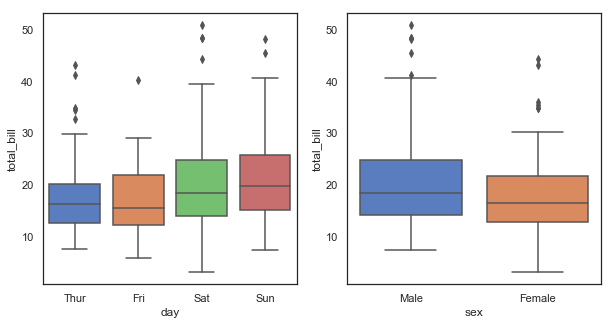

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
boxplot1 = sns.boxplot(x="day", y="total_bill", data=tips)
plt.subplot(1, 2, 2)
boxplot2 = sns.boxplot(x="sex", y="total_bill", data=tips)


### GRADED
    - Using seaborn lmplot(), examine the linear relationship between tips and total_bill across different dimensions to answer the following
    - Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)
    - Are tips larger during lunch or dinner (as a percentage of total_bill)
    - Does the gender that tips the most (as a percentage of total_bill) change between lunch and dinner?
        - Answer the question by visual examination of lmplot output

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Yes, somker give a higher tip.
Tips are more during lunch than during dinner.
Male is more likely to pay more tip for their meals.


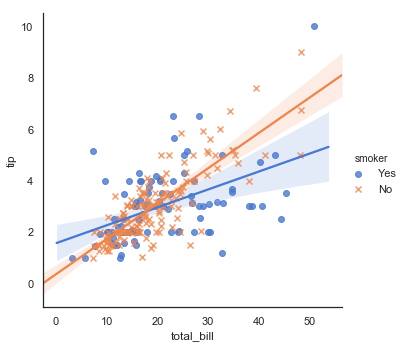

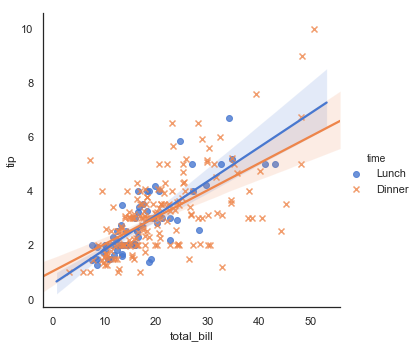

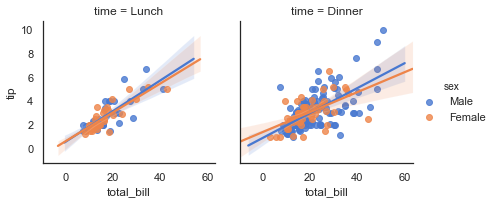

In [39]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, markers=['o', 'x'])
print('Yes, somker give a higher tip.')
sns.lmplot(x='total_bill', y='tip', hue='time', data=tips, markers=['o', 'x'])
print('Tips are more during lunch than during dinner.')
sns.lmplot(x='total_bill', y='tip', hue='sex', col='time', data=tips, height=3)
print('Male is more likely to pay more tip for their meals.')